In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import os
import sys
if os.path.abspath("../") not in sys.path:
    sys.path.append(os.path.abspath("../"))
import matplotlib.pyplot as plt
from sbi.analysis import pairplot, conditional_pairplot, conditional_corrcoeff
from synapsbi.analyse import default_x
import numpy as np
import random
from matplotlib import rcParams
import time
from typing import List
import aux_analysis as aux
import spikeye.visualize as v
import torch
import pickle
import scipy
from synapsbi.utils import apply_n_conditions, load_and_merge

color_input="#36454F"
color_ee = "#A52A2A"
color_ei = (242/256, 140/256, 40/256)
color_ie = (8/256, 143/256, 143/256)
color_ii = (47/256, 85/256, 151/256)

color_pi0 = (127/256, 127/256, 127/256)
color_pi1 = (192/256, 0/256, 0/256)
color_pi2 = (84/256, 130/256, 53/256)
color_pi3 = (46/256, 117/256, 182/256)

#### Load simulated rules

In [5]:
save_dir = "../data_synapsesbi/bg_IF_EEEIIEII_6pPol/"

dataset = load_and_merge(save_dir,
                         ("bg_IF_EEEIIEII_6pPol_all.npy",))

cond_no_nan = ("rate", 0, 1000)
cond_r = ("rate", 1, 50)
cond_cv = ("cv_isi", 0.7, 1000)
cond_sf = ("spatial_Fano", 0.5, 2.5)
cond_tf = ("temporal_Fano", 0.5, 2.5)
cond_ac = ("auto_cov", 0, 0.1)
cond_fft = ("fft", 0, 1)
cond_wb = ("w_blow", 0, 0.1)
cond_srt = ("std_rate_temporal", 0, 0.5)
cond_srs = ("std_rate_spatial", 0, 5)
cond_scv = ("std_cv", 0, 0.2)
cond_wc = ("w_creep", 0, 0.05)
cond_ri = ("rate_i", 1, 50)
cond_weef =("weef", 0 ,0.5)
cond_weif =("weif", 0 ,0.5)
cond_wief =("wief", 0 ,5)
cond_wiif =("wiif", 0 ,5)

cond_all = (cond_r,cond_ri,
            cond_wb,cond_wc,cond_weef,cond_weif, cond_wief, cond_wiif,
            cond_ac,cond_cv,cond_fft,cond_srt,cond_srs,cond_sf,cond_tf)

condition = apply_n_conditions(dataset, cond_all)

print("Keeping", np.sum(condition), "simulations out of", len(dataset), np.sum(condition)/len(dataset)*100,"%")

retrieved 354300/354300 simulations
Keeping 60004 simulations out of 354300 16.935930002822467 %


In [6]:
tau_pre_EE = dataset[condition]['theta'][:,0]
tau_post_EE = dataset[condition]['theta'][:,1]
alpha_EE = dataset[condition]['theta'][:,2]
beta_EE = dataset[condition]['theta'][:,3]
gamma_EE = dataset[condition]['theta'][:,4]
kappa_EE = dataset[condition]['theta'][:,5]
lambd_EE = kappa_EE*tau_post_EE+gamma_EE*tau_pre_EE

tau_pre_EI = dataset[condition]['theta'][:,6]
tau_post_EI = dataset[condition]['theta'][:,7]
alpha_EI = dataset[condition]['theta'][:,8]
beta_EI = dataset[condition]['theta'][:,9]
gamma_EI = dataset[condition]['theta'][:,10]
kappa_EI = dataset[condition]['theta'][:,11]
lambd_EI = kappa_EI*tau_post_EI+gamma_EI*tau_pre_EI

tau_pre_IE = dataset[condition]['theta'][:,12]
tau_post_IE = dataset[condition]['theta'][:,13]
alpha_IE = dataset[condition]['theta'][:,14]
beta_IE = dataset[condition]['theta'][:,15]
gamma_IE = dataset[condition]['theta'][:,16]
kappa_IE = dataset[condition]['theta'][:,17]
lambd_IE = kappa_IE*tau_post_IE+gamma_IE*tau_pre_IE

tau_pre_II = dataset[condition]['theta'][:,18]
tau_post_II = dataset[condition]['theta'][:,19]
alpha_II = dataset[condition]['theta'][:,20]
beta_II = dataset[condition]['theta'][:,21]
gamma_II = dataset[condition]['theta'][:,22]
kappa_II = dataset[condition]['theta'][:,23]
lambd_II = kappa_II*tau_post_II+gamma_II*tau_pre_II

input_rate = dataset[condition]['theta'][:,24]

tot_EE = alpha_EE + beta_EE + lambd_EE
tot_EI = alpha_EI + beta_EI + lambd_EI
tot_IE = alpha_IE + beta_IE + lambd_IE
tot_II = alpha_II + beta_II + lambd_II

r = dataset[condition]['rate']
cv = dataset[condition]['cv_isi']
kl = dataset[condition]['kl_isi']
sf = dataset[condition]['spatial_Fano']
tf = dataset[condition]['temporal_Fano']
ac = dataset[condition]['auto_cov']
fft = dataset[condition]['fft']
wb = dataset[condition]['w_blow']
srt = dataset[condition]['std_rate_temporal']
srs = dataset[condition]['std_rate_spatial']
scv = dataset[condition]['std_cv']
ri = dataset[condition]['rate_i']
wc = dataset[condition]['w_creep']
weef = dataset[condition]['weef']
weif = dataset[condition]['weif']
wief = dataset[condition]['wief']
wiif = dataset[condition]['wiif']

#### Plot some rules

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


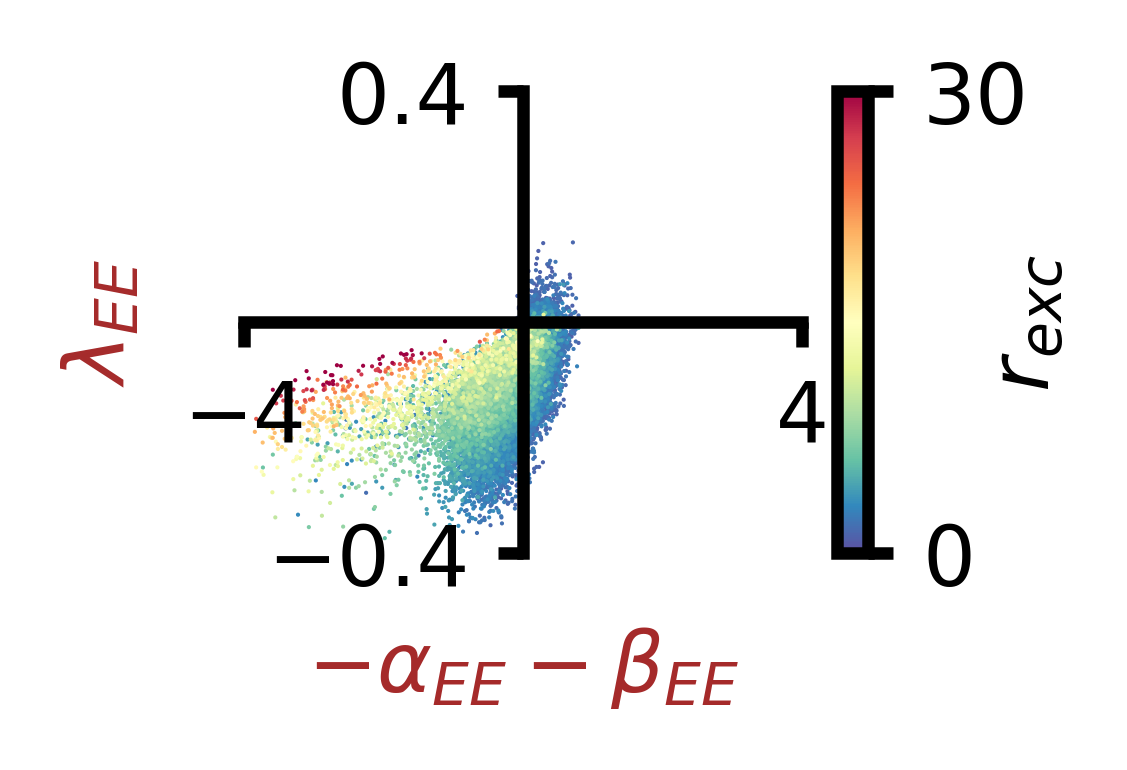

In [7]:
## EE
aux.plot_2data_1heatmap(-alpha_EE -beta_EE, lambd_EE, r, 
                        r'$-\alpha_{EE}-\beta_{EE}$', 
                        r'$\lambda_{EE}$', 
                        r'$r_{exc}$', 
                        xlim = [-4,4],
                        ylim = [-0.4,0.4],
                        xticks = [-4,4],
                        yticks = [-0.4,0.4],
                        clim=[0,30],
                        cbarticks = [0,30],
                        center_axes = True,
                        s = 0.25,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=20,
                        yhandlepad=15,
                        cbarhandlepad=-5,
                        cmap='Spectral_r', #terrain  nipy_spectral
                        ordering=True,
                        figsize=(1.5,1),
                        color_xlabel=color_ee,
                        color_ylabel=color_ee,
                        dpi=600)

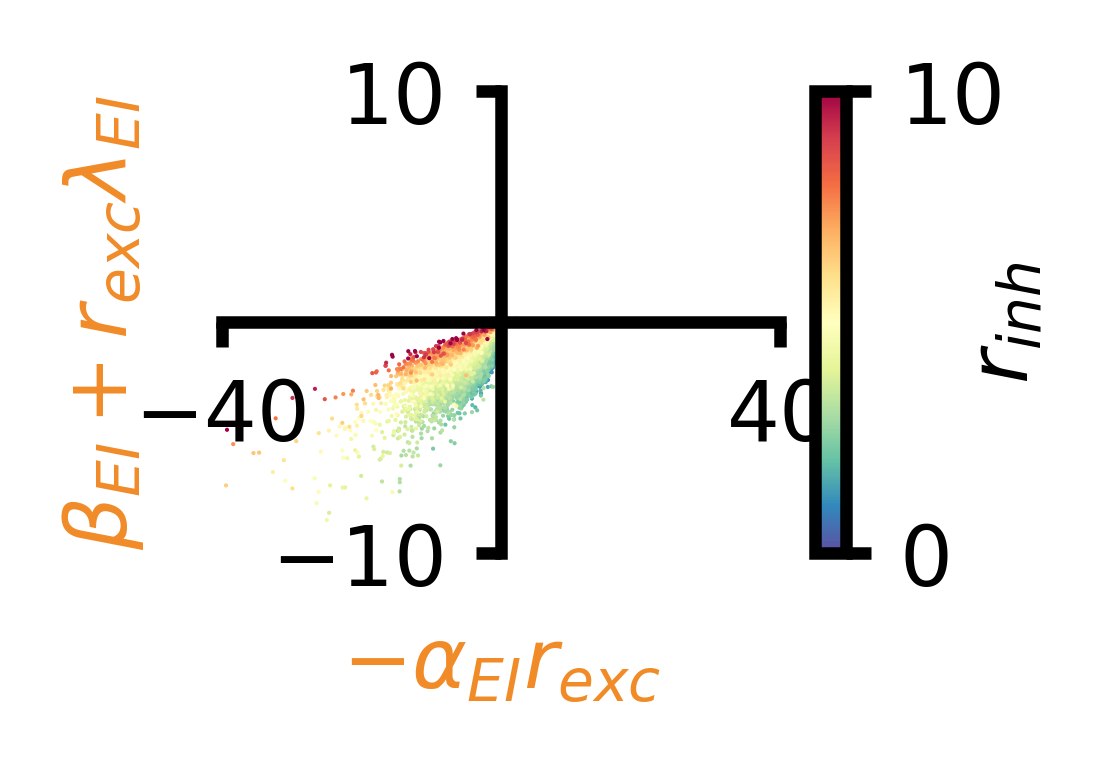

In [8]:
## EI 
aux.plot_2data_1heatmap(-alpha_EI*r, beta_EI + lambd_EI*r, ri,
                        r'$-\alpha_{EI}r_{exc}$',
                        r'$\beta_{EI} + r_{exc} \lambda_{EI}$',
#                         r'$\beta_{EI} + $' + "\n" + r'$r_{exc}(\kappa_{EI}\tau^{post}_{EI} + \gamma_{EI}\tau^{pre}_{EI})$',
                        r'$r_{inh}$', 
                      xlim = [-40, 40],
                      ylim = [-10,10],
                      xticks = [-40,40],
                      yticks = [-10,10],
                      clim=[0,10],
                        cbarticks = [0,10],
                        center_axes = True,
                        s = 0.25,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=20,
                        yhandlepad=15,
                        cbarhandlepad=-5,
                        cmap='Spectral_r', #terrain  nipy_spectral
                        ordering=True,
                        figsize=(1.5,1),
                        color_xlabel=color_ei,
                        color_ylabel=color_ei,
                        dpi=600)

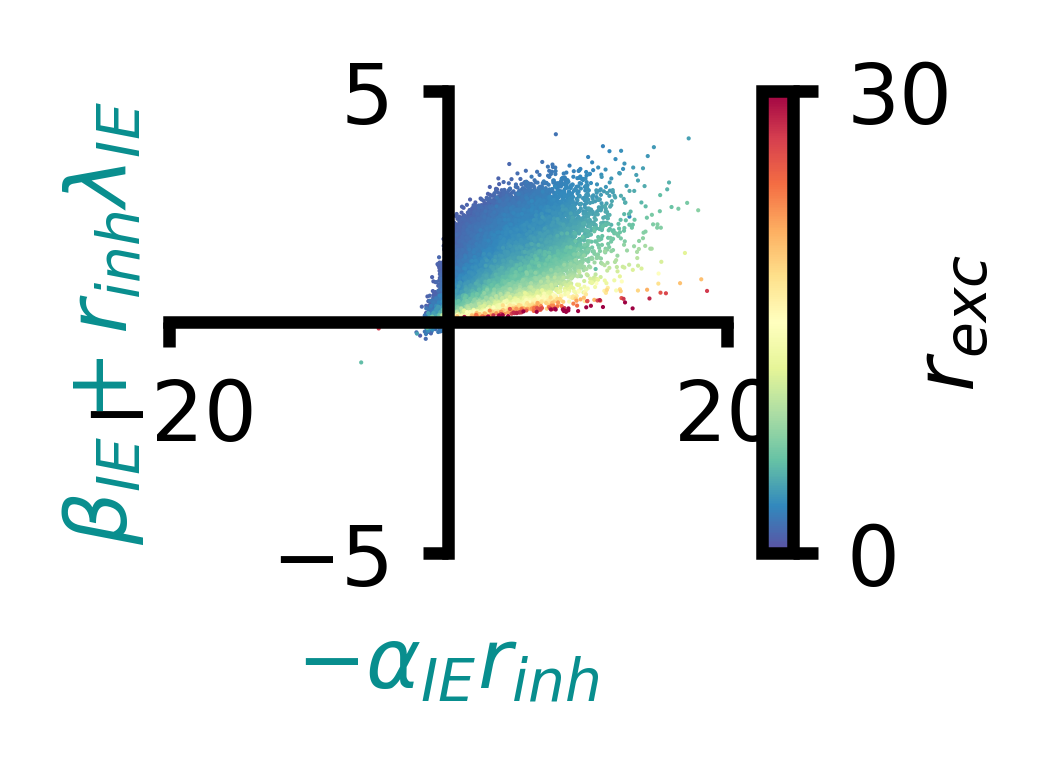

In [9]:
## IE
aux.plot_2data_1heatmap(-alpha_IE*ri, beta_IE + lambd_IE*ri, r, 
                              r'$-\alpha_{IE}r_{inh}$',
                              r'$\beta_{IE} + r_{inh} \lambda_{IE}$',
                              r'$r_{exc}$',
                              xlim = [-20,20],
                              ylim = [-5,5],
                              xticks = [-20,20],
                              yticks = [-5,5],
                        clim=[0,30],
                        cbarticks = [0,30],
                        center_axes = True,
                        s = 0.25,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=20,
                        yhandlepad=15,
                        cbarhandlepad=-5,
                        cmap='Spectral_r', #terrain  nipy_spectral
                        ordering=True,
                        figsize=(1.5,1),
                        color_xlabel=color_ie,
                        color_ylabel=color_ie,
                        dpi=600)

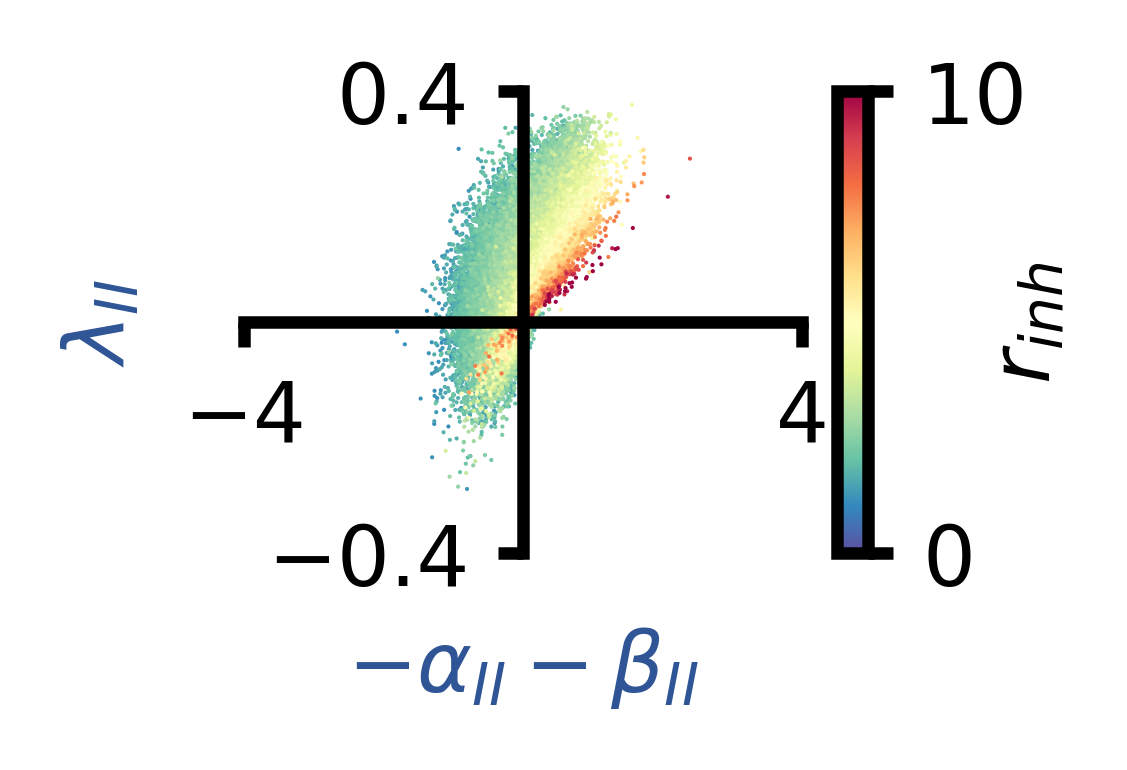

In [10]:
## II
aux.plot_2data_1heatmap(-alpha_II -beta_II, lambd_II, ri,
                              r'$-\alpha_{II}-\beta_{II}$',
                              r'$\lambda_{II}$',
                              r'$r_{inh}$',
                              xlim = [-4,4],
                              ylim = [-0.4,0.4],
                              xticks = [-4,4],
                              yticks = [-0.4,0.4],
                        clim=[0,10],
                        cbarticks = [0,10],
                        center_axes = True,
                        s = 0.25,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=20,
                        yhandlepad=15,
                        cbarhandlepad=-5,
                        cmap='Spectral_r', #terrain  nipy_spectral
                        ordering=True,
                        figsize=(1.5,1),
                        color_xlabel=color_ii,
                        color_ylabel=color_ii,
                        dpi=600)

#### Mean-field posterior and comparison to SBI posterior

##### Make and sample EE MF posterior

In [12]:
def mean_field_prior_EE(taus_lim=[0.01,0.1], other_lim = [-2,2], rate_range=[0.1,50]):
    alpha = -1; beta = 0
    while np.logical_or(alpha + beta < 0, np.logical_or(other_lim[0] > beta, beta > other_lim[1])) :
        rate = np.random.uniform(low=rate_range[0], high=rate_range[1])
        tau_pre = np.random.uniform(low=taus_lim[0], high=taus_lim[1])
        tau_post = np.random.uniform(low=taus_lim[0], high=taus_lim[1])
        alpha = np.random.uniform(low=other_lim[0], high=other_lim[1])
        gamma = np.random.uniform(low=other_lim[0], high=other_lim[1])
        kappa = np.random.uniform(low=other_lim[0], high=other_lim[1])
        beta = -alpha -(kappa*tau_post + gamma*tau_pre)*rate
    return([tau_pre, tau_post, alpha, beta, gamma, kappa])
    
mean_field_samples = np.array([mean_field_prior_EE() for i in range(10000)])
alpha_p_beta_mf = mean_field_samples[:, 2] + mean_field_samples[:, 3]
lambd_mf = mean_field_samples[:, 5]*mean_field_samples[:, 1] + mean_field_samples[:, 4]*mean_field_samples[:, 0]

##### Plot MF samples

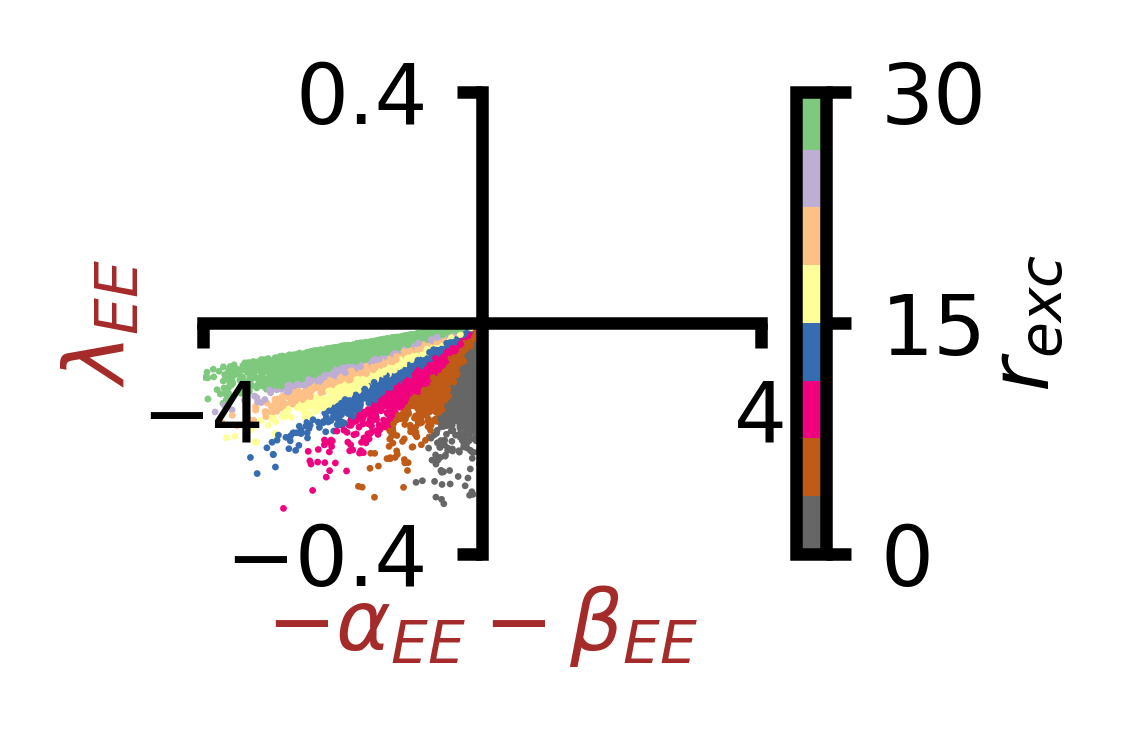

In [13]:
aux.plot_2data_1heatmap(-alpha_p_beta_mf, lambd_mf, -alpha_p_beta_mf/lambd_mf, 
                            r'$-\alpha_{EE}-\beta_{EE}$', 
                            r'$\lambda_{EE}$', 
                            r'$r_{exc}$', 
                            xlim = [-4,4],
                            ylim = [-0.4,0.4],
                            xticks = [-4,4],
                            yticks = [-0.4,0.4],
                            clim=[0,30],
                            cbarticks = [0,15,30],
                            center_axes = True,
                            s = 0.66,
                            fontsize=10,
                            linewidth = 1.5,
                            xhandlepad=15,
                            yhandlepad=10,
                            cbarhandlepad=0,
                            cmap='Accent_r', #terrain  nipy_spectral
                            ordering=None,
                            figsize=(1.5,1),
                            color_xlabel=color_ee,
                            color_ylabel=color_ee,
                            dpi=600)

##### Compute distance between each MF sample and fSBI posterior

In [14]:
tree = scipy.spatial.KDTree(dataset[condition]['theta'][:,:6]) #kd tree provides a quick way to compute many pairwise distances between a point and a clouds of points
distances = tree.query(mean_field_samples, k=3)[0]
distances = np.mean(distances, axis=1)

##### Where are the MF samples not includeed by fSBI?

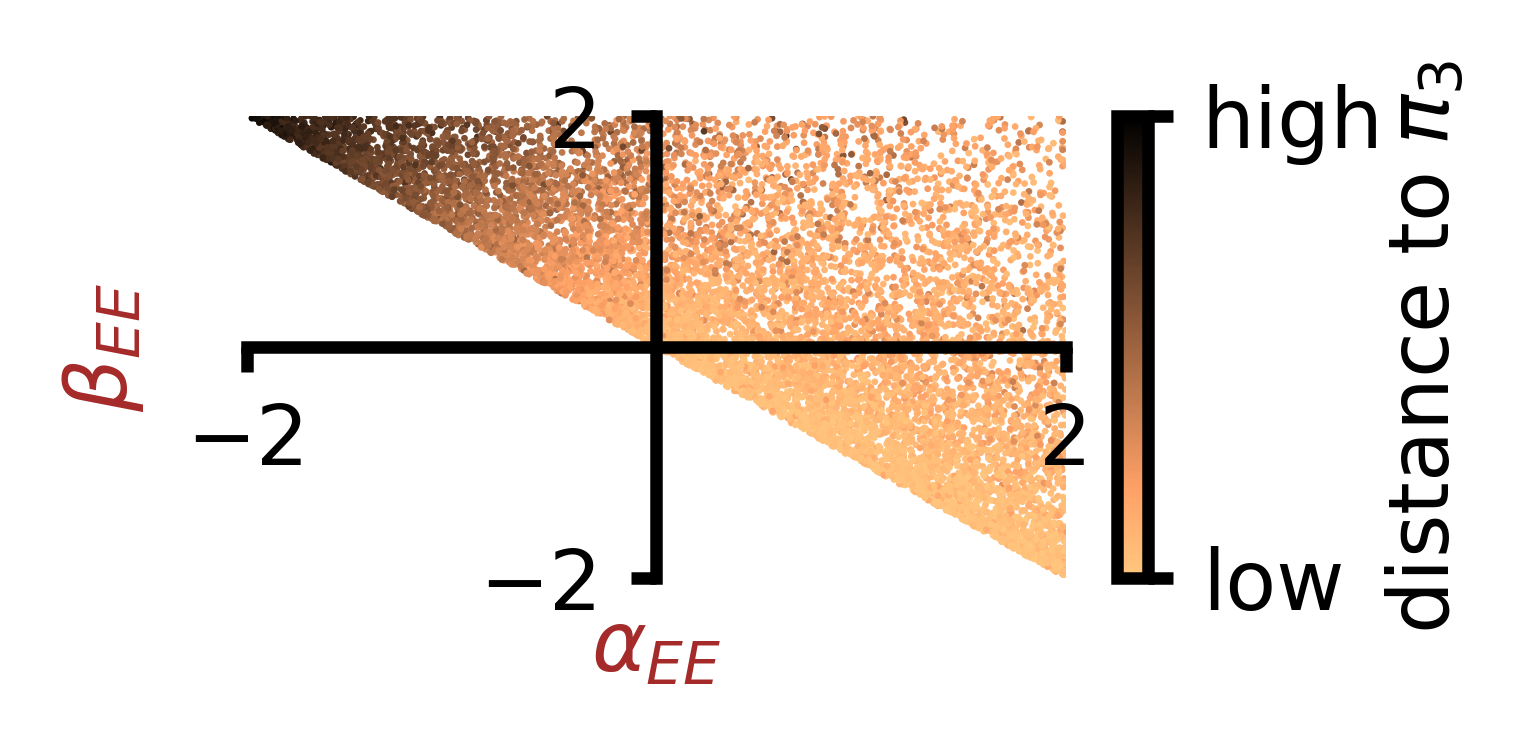

In [15]:
aux.plot_2data_1heatmap(mean_field_samples[:, 2], mean_field_samples[:, 3], distances, 
                              r'$\alpha_{EE}$', 
                              r'$\beta_{EE}$', 
                              "distance to " + r'$\pi_3$', 
                              xlim = [-2,2],
                              ylim = [-2,2],
                              xticks = [-2,2],
                              yticks = [-2,2],
                              clim=None,
                        cbarticks = [min(distances), max(distances)],
                        cbarticklabels=["low", "high"],
                        center_axes = True,
                        s = 0.66,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=15,
                        yhandlepad=40,
                        cbarhandlepad=0,
                        cmap='copper_r', #terrain  nipy_spectral
                        ordering=None,
                        figsize=(2.2,1),
                        color_xlabel=color_ee,
                        color_ylabel=color_ee,
                        dpi=600)

##### Where are the rules in posterior far from mean-field

In [17]:
tree = scipy.spatial.KDTree(mean_field_samples) #kd tree provides a quick way to compute many pairwise distances between a point and a clouds of points
distances = tree.query(dataset[condition]['theta'][:,:6], k=30)[0]
distances = np.mean(distances, axis=1)

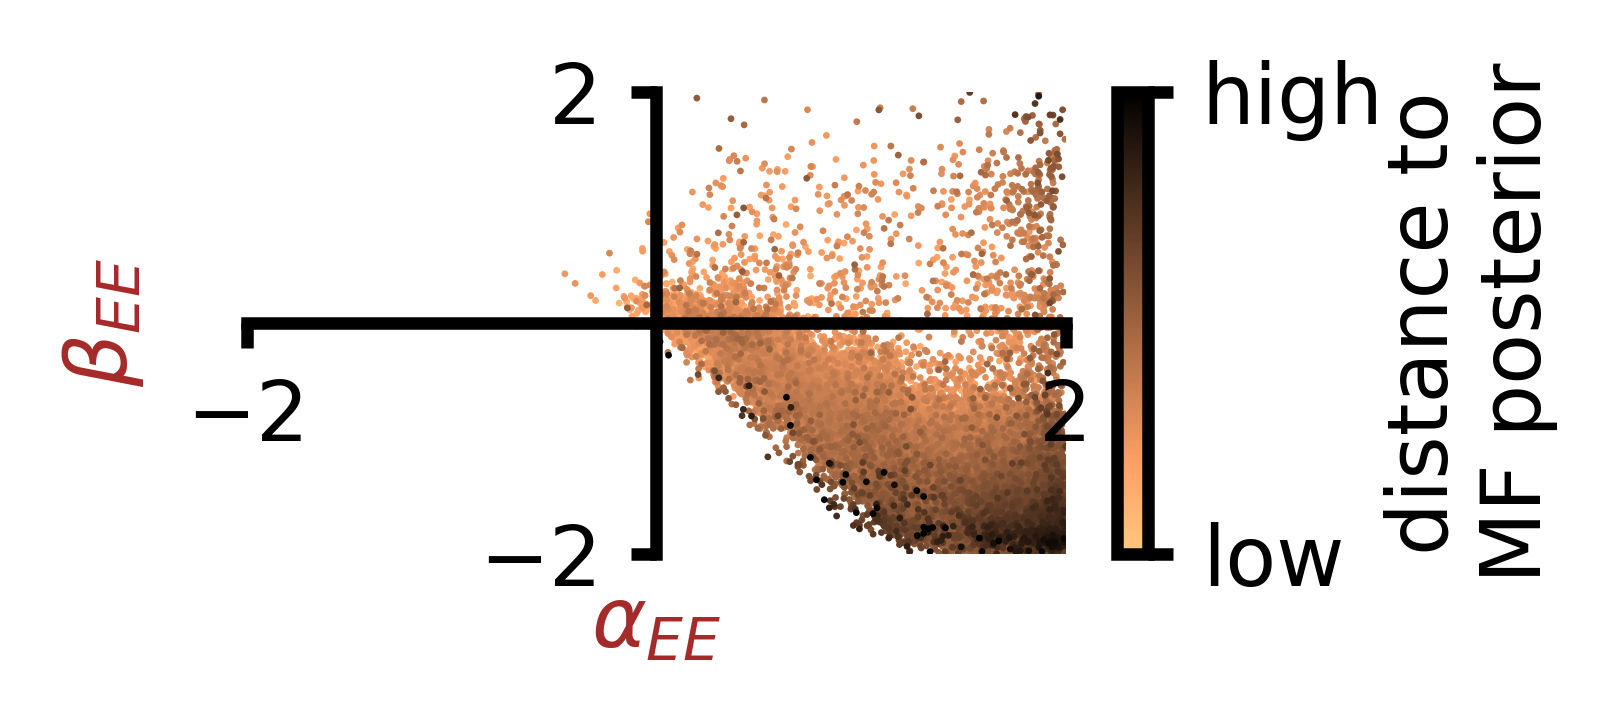

In [18]:
m = max(distances)
m = 0.9

aux.plot_2data_1heatmap(dataset[condition]['theta'][:,2], dataset[condition]['theta'][:,3], distances, 
                              r'$\alpha_{EE}$', 
                              r'$\beta_{EE}$', 
                              "distance to\nMF posterior", 
                              xlim = [-2,2],
                              ylim = [-2,2],
                              xticks = [-2,2],
                              yticks = [-2,2],
                              clim=[min(distances), m],
                        cbarticks = [min(distances), m],
                        cbarticklabels=["low", "high"],
                        center_axes = True,
                        s = 0.66,
                        fontsize=10,
                        linewidth = 1.5,
                        xhandlepad=15,
                        yhandlepad=40,
                        cbarhandlepad=0,
                        cmap='copper_r', #terrain  nipy_spectral
                        ordering=True,
                        figsize=(2.2,1),
                        color_xlabel=color_ee,
                        color_ylabel=color_ee,
                        dpi=600)

#### Conditional pairplot

In [27]:
default_x_dict = default_x()

runs_path = "../runs_synapsesbi/bg_IF_EEEIIEII_6pPol/"

with open(runs_path + "posterior_0r_f2_1r_f0.pkl", "rb") as file:
    mk_post = pickle.load(file)
    
    
posterior = mk_post.posterior

limits=torch.tensor([[0.01, .1], [0.01, .1], [-2.,2], [-2.,2], [-2.,2], [-2.,2],
            [0.01, .1], [0.01, .1], [-2.,2], [-2.,2], [-2.,2], [-2.,2],
            [0.01, .1], [0.01, .1], [-2.,2], [-2.,2], [-2.,2], [-2.,2],
            [0.01, .1], [0.01, .1], [-2.,2], [-2.,2], [-2.,2], [-2.,2]])

post_num_samples = 3
x = torch.tensor([[9.9],[10],[10.1]])
print(x)

posterior.set_default_x(torch.tensor([[default_x_dict["w_creep"](1)]]))

tensor([[ 9.9000],
        [10.0000],
        [10.1000]])


NeuralPosteriorEnsemble sampler for potential_fn=<EnsemblePotential>

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/bconfavr/miniconda3/envs/libdyn/lib/python3.10/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484808560/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:2183.)
  outputs, _ = torch.triangular_solve(


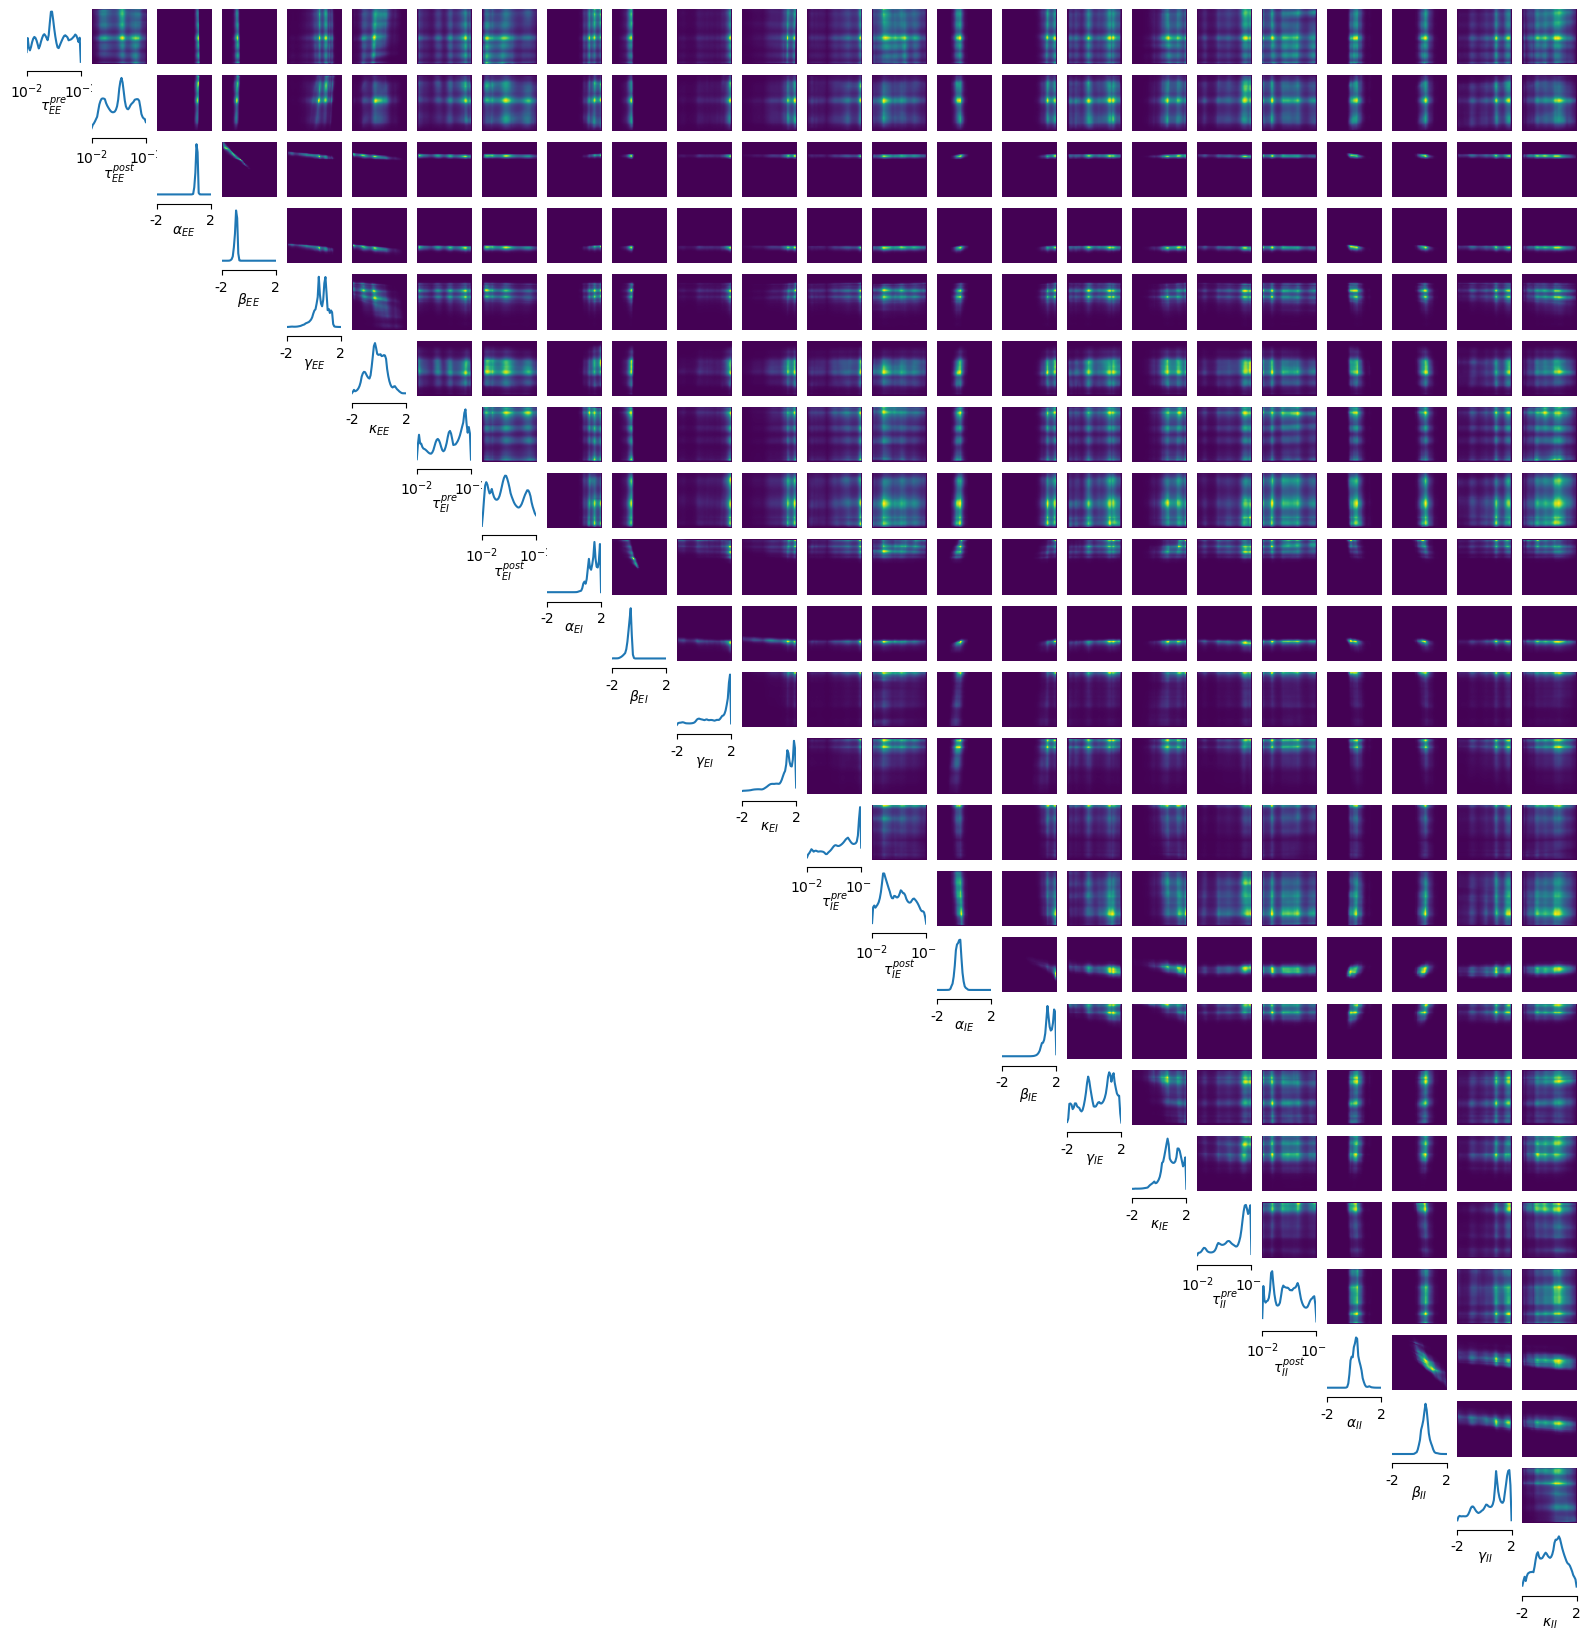

In [28]:
# Plot slices through posterior, i.e. conditionals.
fig, axes = conditional_pairplot(
    density=posterior,
    condition=posterior.sample((1,)),
    limits=limits)

labels = [r"$\tau^{pre}_{EE}$", r"$\tau^{post}_{EE}$", r"$\alpha_{EE}$", r"$\beta_{EE}$", r"$\gamma_{EE}$", r"$\kappa_{EE}$",
          r"$\tau^{pre}_{EI}$", r"$\tau^{post}_{EI}$", r"$\alpha_{EI}$", r"$\beta_{EI}$", r"$\gamma_{EI}$", r"$\kappa_{EI}$",
          r"$\tau^{pre}_{IE}$", r"$\tau^{post}_{IE}$", r"$\alpha_{IE}$", r"$\beta_{IE}$", r"$\gamma_{IE}$", r"$\kappa_{IE}$",
          r"$\tau^{pre}_{II}$", r"$\tau^{post}_{II}$", r"$\alpha_{II}$", r"$\beta_{II}$", r"$\gamma_{II}$", r"$\kappa_{II}$"]
for i in range(24):
    for j in range(i, 24): 
        if i!=j:
            axes[i, j].set_xticks([])
        if i==j:
            axes[i, j].set_xlabel(labels[i], fontsize=10, labelpad=-3)
            if i in [0,1,6,7,12,13,18,19]:
                axes[i, j].set_xticks([0.01,0.1])
                axes[i, j].set_xlim([0.01,0.1])
                axes[i, j].set_xticklabels([r'$10^{-2}$',r'$10^{-1}$'])
            else:
                axes[i, j].set_xticks([-2,2])
                axes[i, j].set_xlim([-2,2])
fig.patch.set_facecolor("white")
fig.set_size_inches(20, 20)
plt.show()

In [29]:
cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=posterior.sample((1,)),
    limits=limits,
)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/bconfavr/miniconda3/envs/libdyn/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484808560/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


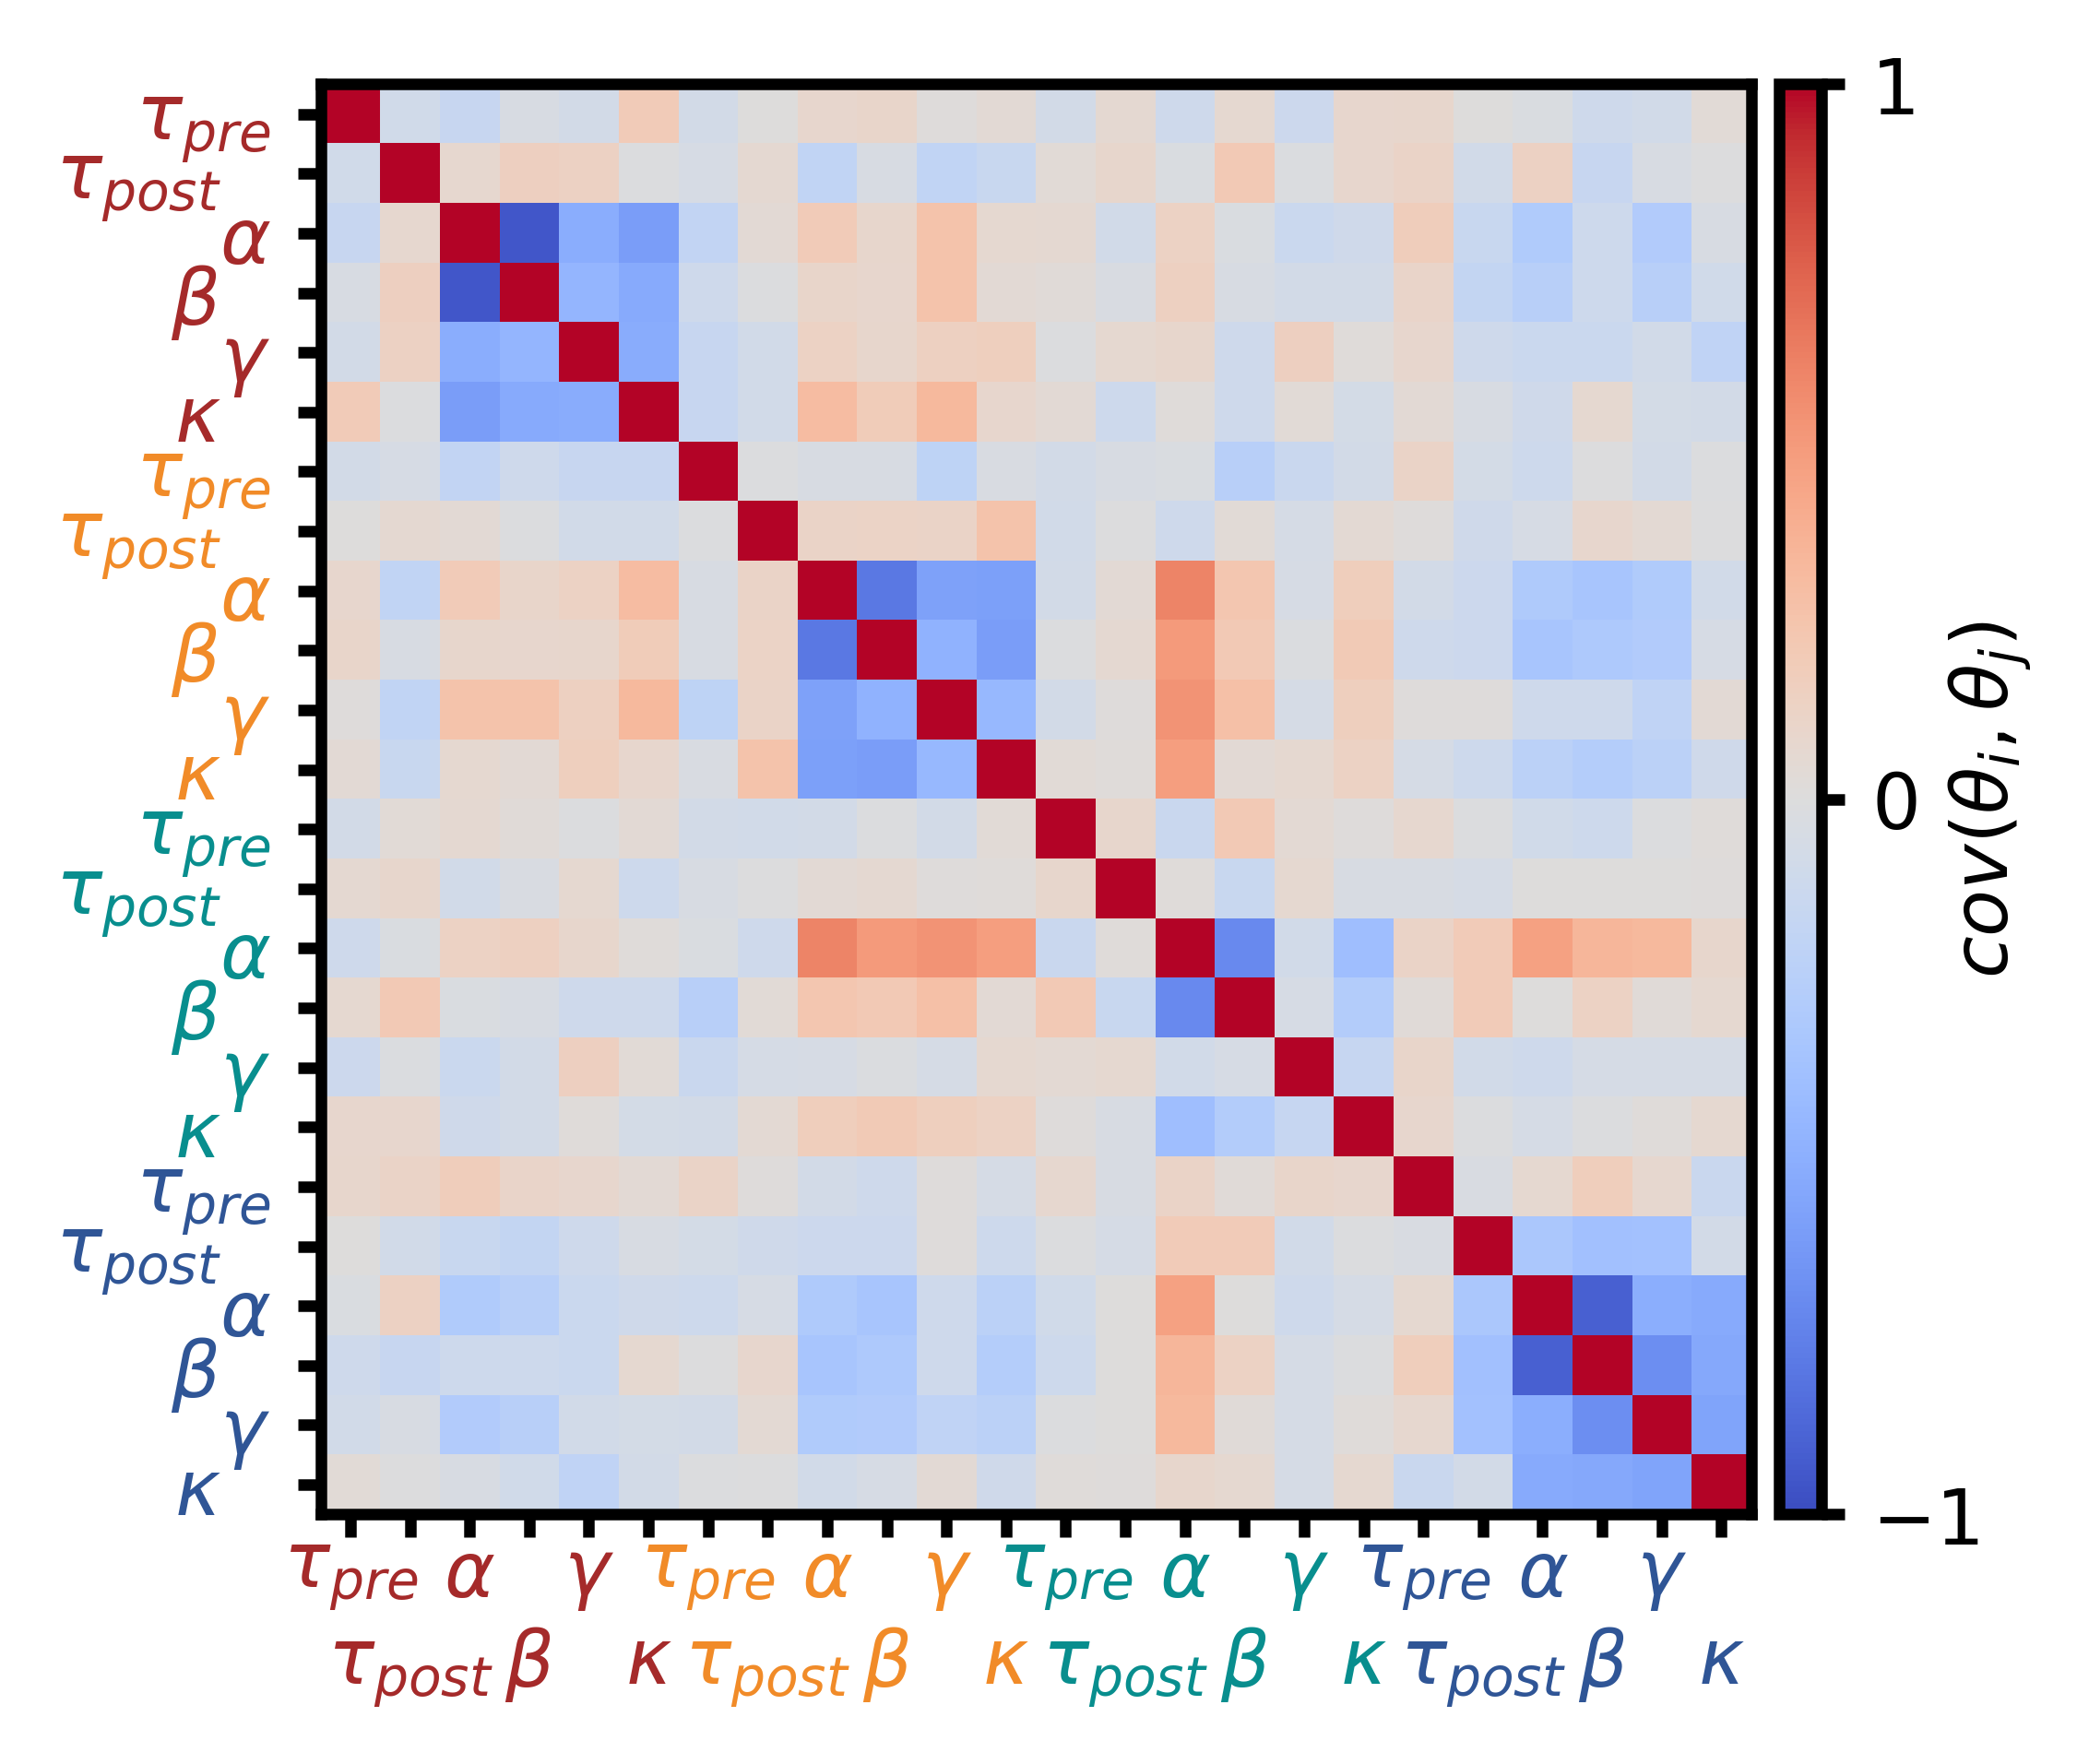

In [30]:
labelsx = [r"$\tau_{pre}$", "\n"+r'$\tau_{post}$', r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$"]

labelsy = [r"$\tau_{pre}$", r'$\tau_{post}$'+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   "]

aux.plot_mat_poly(cond_coeff_mat,
             figsize=(3.5,3.5),
             cmap="coolwarm",
             dpi=600,
             linewidth=1.5,
             fontsize=10,
             rotation=0,
             labelsx=labelsx,
             labelsy=labelsy,
             color_ee=color_ee,
             color_ei=color_ei,
             color_ie=color_ie,
             color_ii=color_ii,
             heatmap_label=r'$cov(\theta_i,\theta_j)$',
             cbarhandlepad=-5)

#### Pairplot

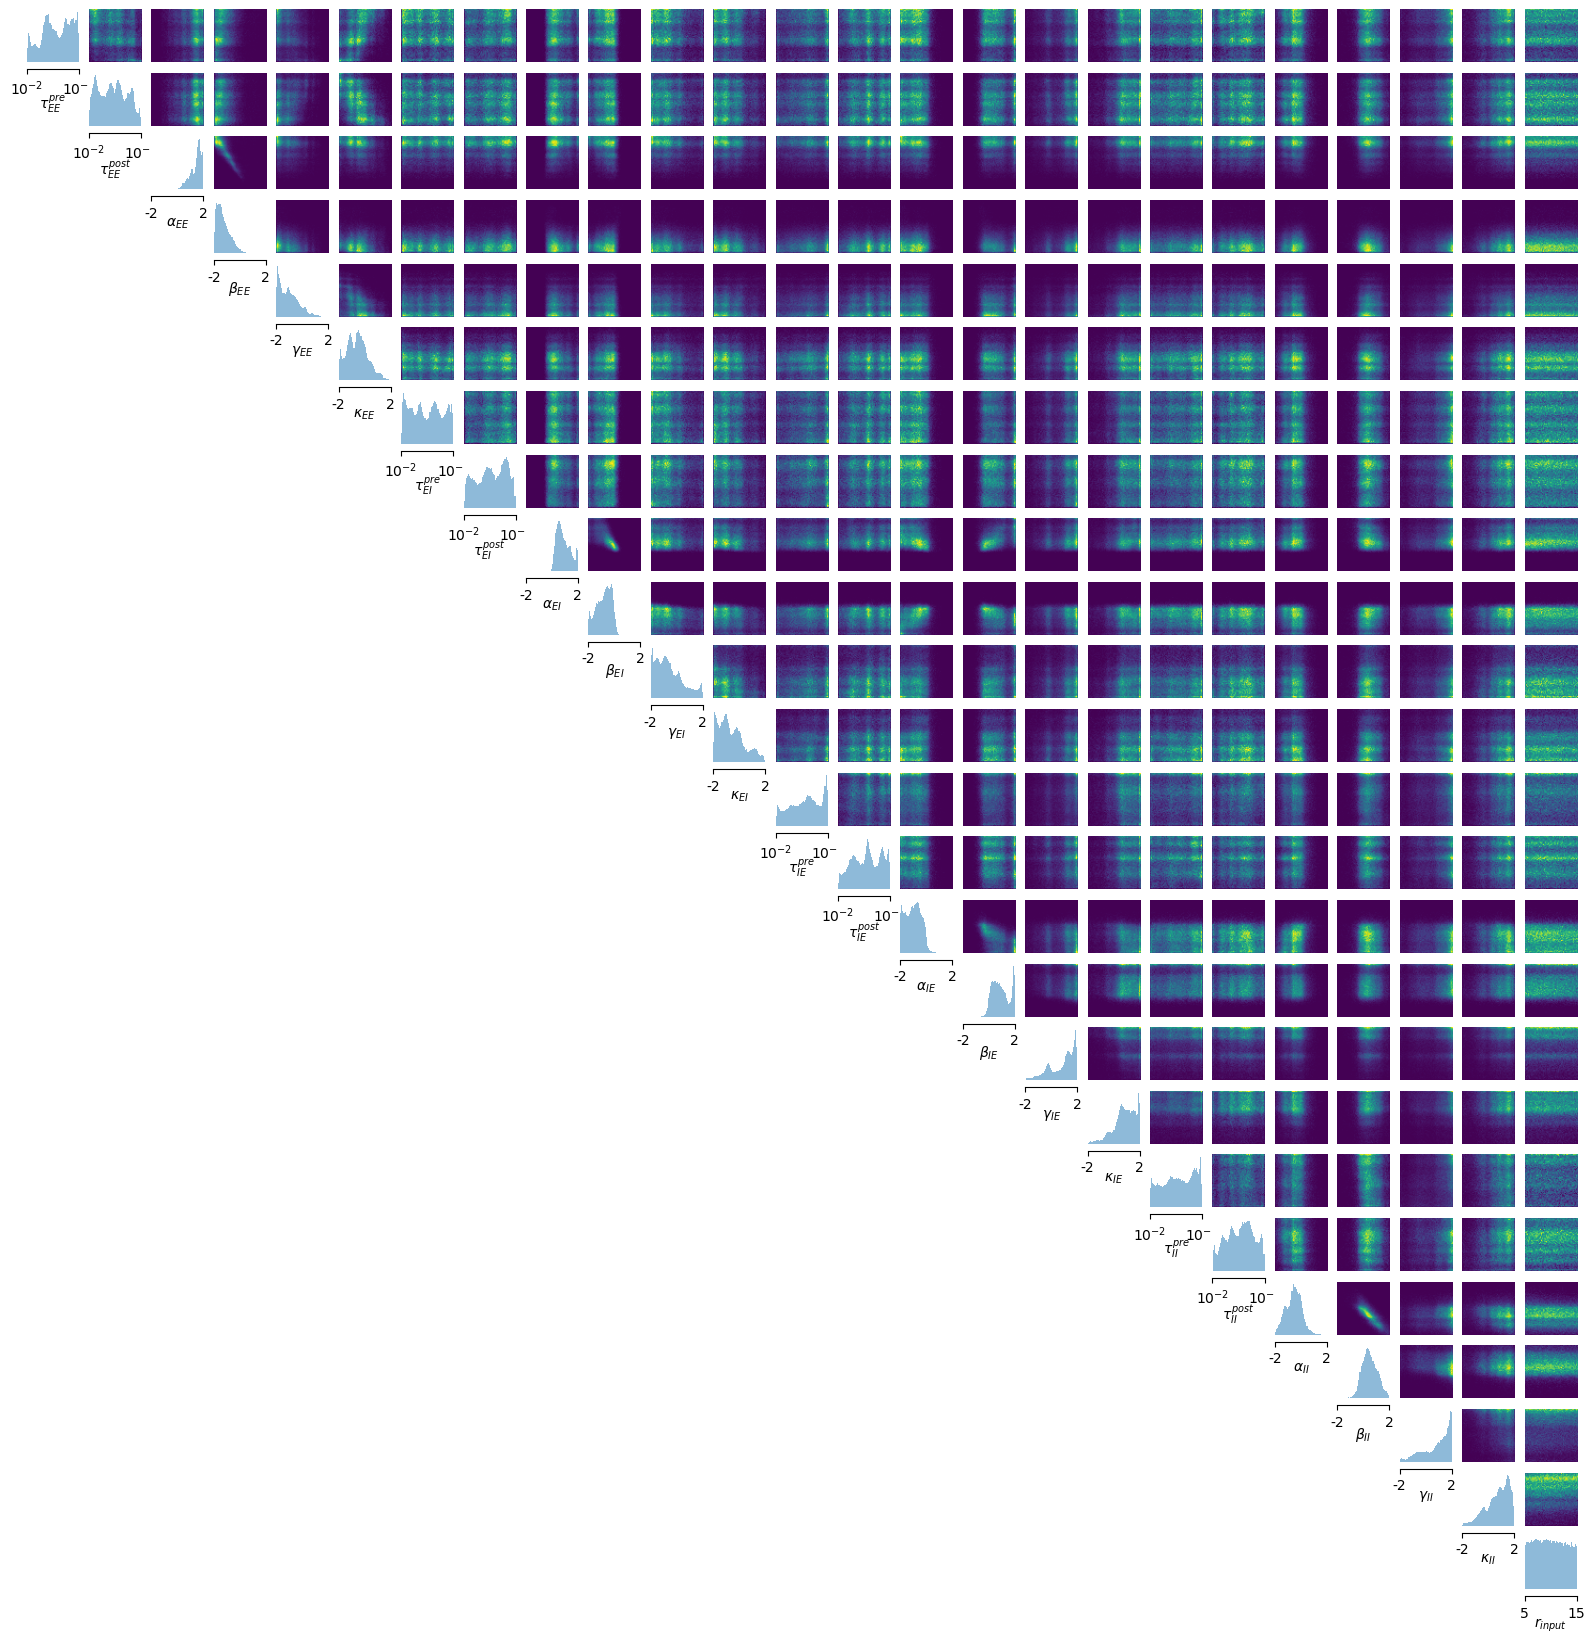

In [19]:
dim_theta = len(dataset['theta'][0])
fig, axes = pairplot(samples=[dataset[condition]['theta']],
                     diag='hist',
                     upper='hist',
                     hist_diag= {'alpha': .5, 'bins': 50, 'density': True, 'histtype': 'stepfilled'},
                     points_colors=["tab:red"],
                     points_diag = {"lw": 4})

labels = [r"$\tau^{pre}_{EE}$", r"$\tau^{post}_{EE}$", r"$\alpha_{EE}$", r"$\beta_{EE}$", r"$\gamma_{EE}$", r"$\kappa_{EE}$",
          r"$\tau^{pre}_{EI}$", r"$\tau^{post}_{EI}$", r"$\alpha_{EI}$", r"$\beta_{EI}$", r"$\gamma_{EI}$", r"$\kappa_{EI}$",
          r"$\tau^{pre}_{IE}$", r"$\tau^{post}_{IE}$", r"$\alpha_{IE}$", r"$\beta_{IE}$", r"$\gamma_{IE}$", r"$\kappa_{IE}$",
          r"$\tau^{pre}_{II}$", r"$\tau^{post}_{II}$", r"$\alpha_{II}$", r"$\beta_{II}$", r"$\gamma_{II}$", r"$\kappa_{II}$",
          r'$r_{input}$']
for i in range(dim_theta):
    for j in range(i, dim_theta): 
        if i!=j:
            axes[i, j].set_xticks([])
        if i==j:
            axes[i, j].set_xlabel(labels[i], fontsize=10, labelpad=-3)
            if i in [0,1,6,7,12,13,18,19]:
                axes[i, j].set_xticks([0.01,0.1])
                axes[i, j].set_xlim([0.01,0.1])
                axes[i, j].set_xticklabels([r'$10^{-2}$',r'$10^{-1}$'])
            elif i == 24:
                axes[i, j].set_xticks([5,15])
                axes[i, j].set_xlim([5,15])
            else:
                axes[i, j].set_xticks([-2,2])
                axes[i, j].set_xlim([-2,2])
fig.patch.set_facecolor("white")
fig.set_size_inches(20, 20)
plt.show()

In [20]:
corr_matrix_marginal = np.corrcoef(dataset[condition]['theta'].T)

/home/bconfavr/miniconda3/envs/libdyn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


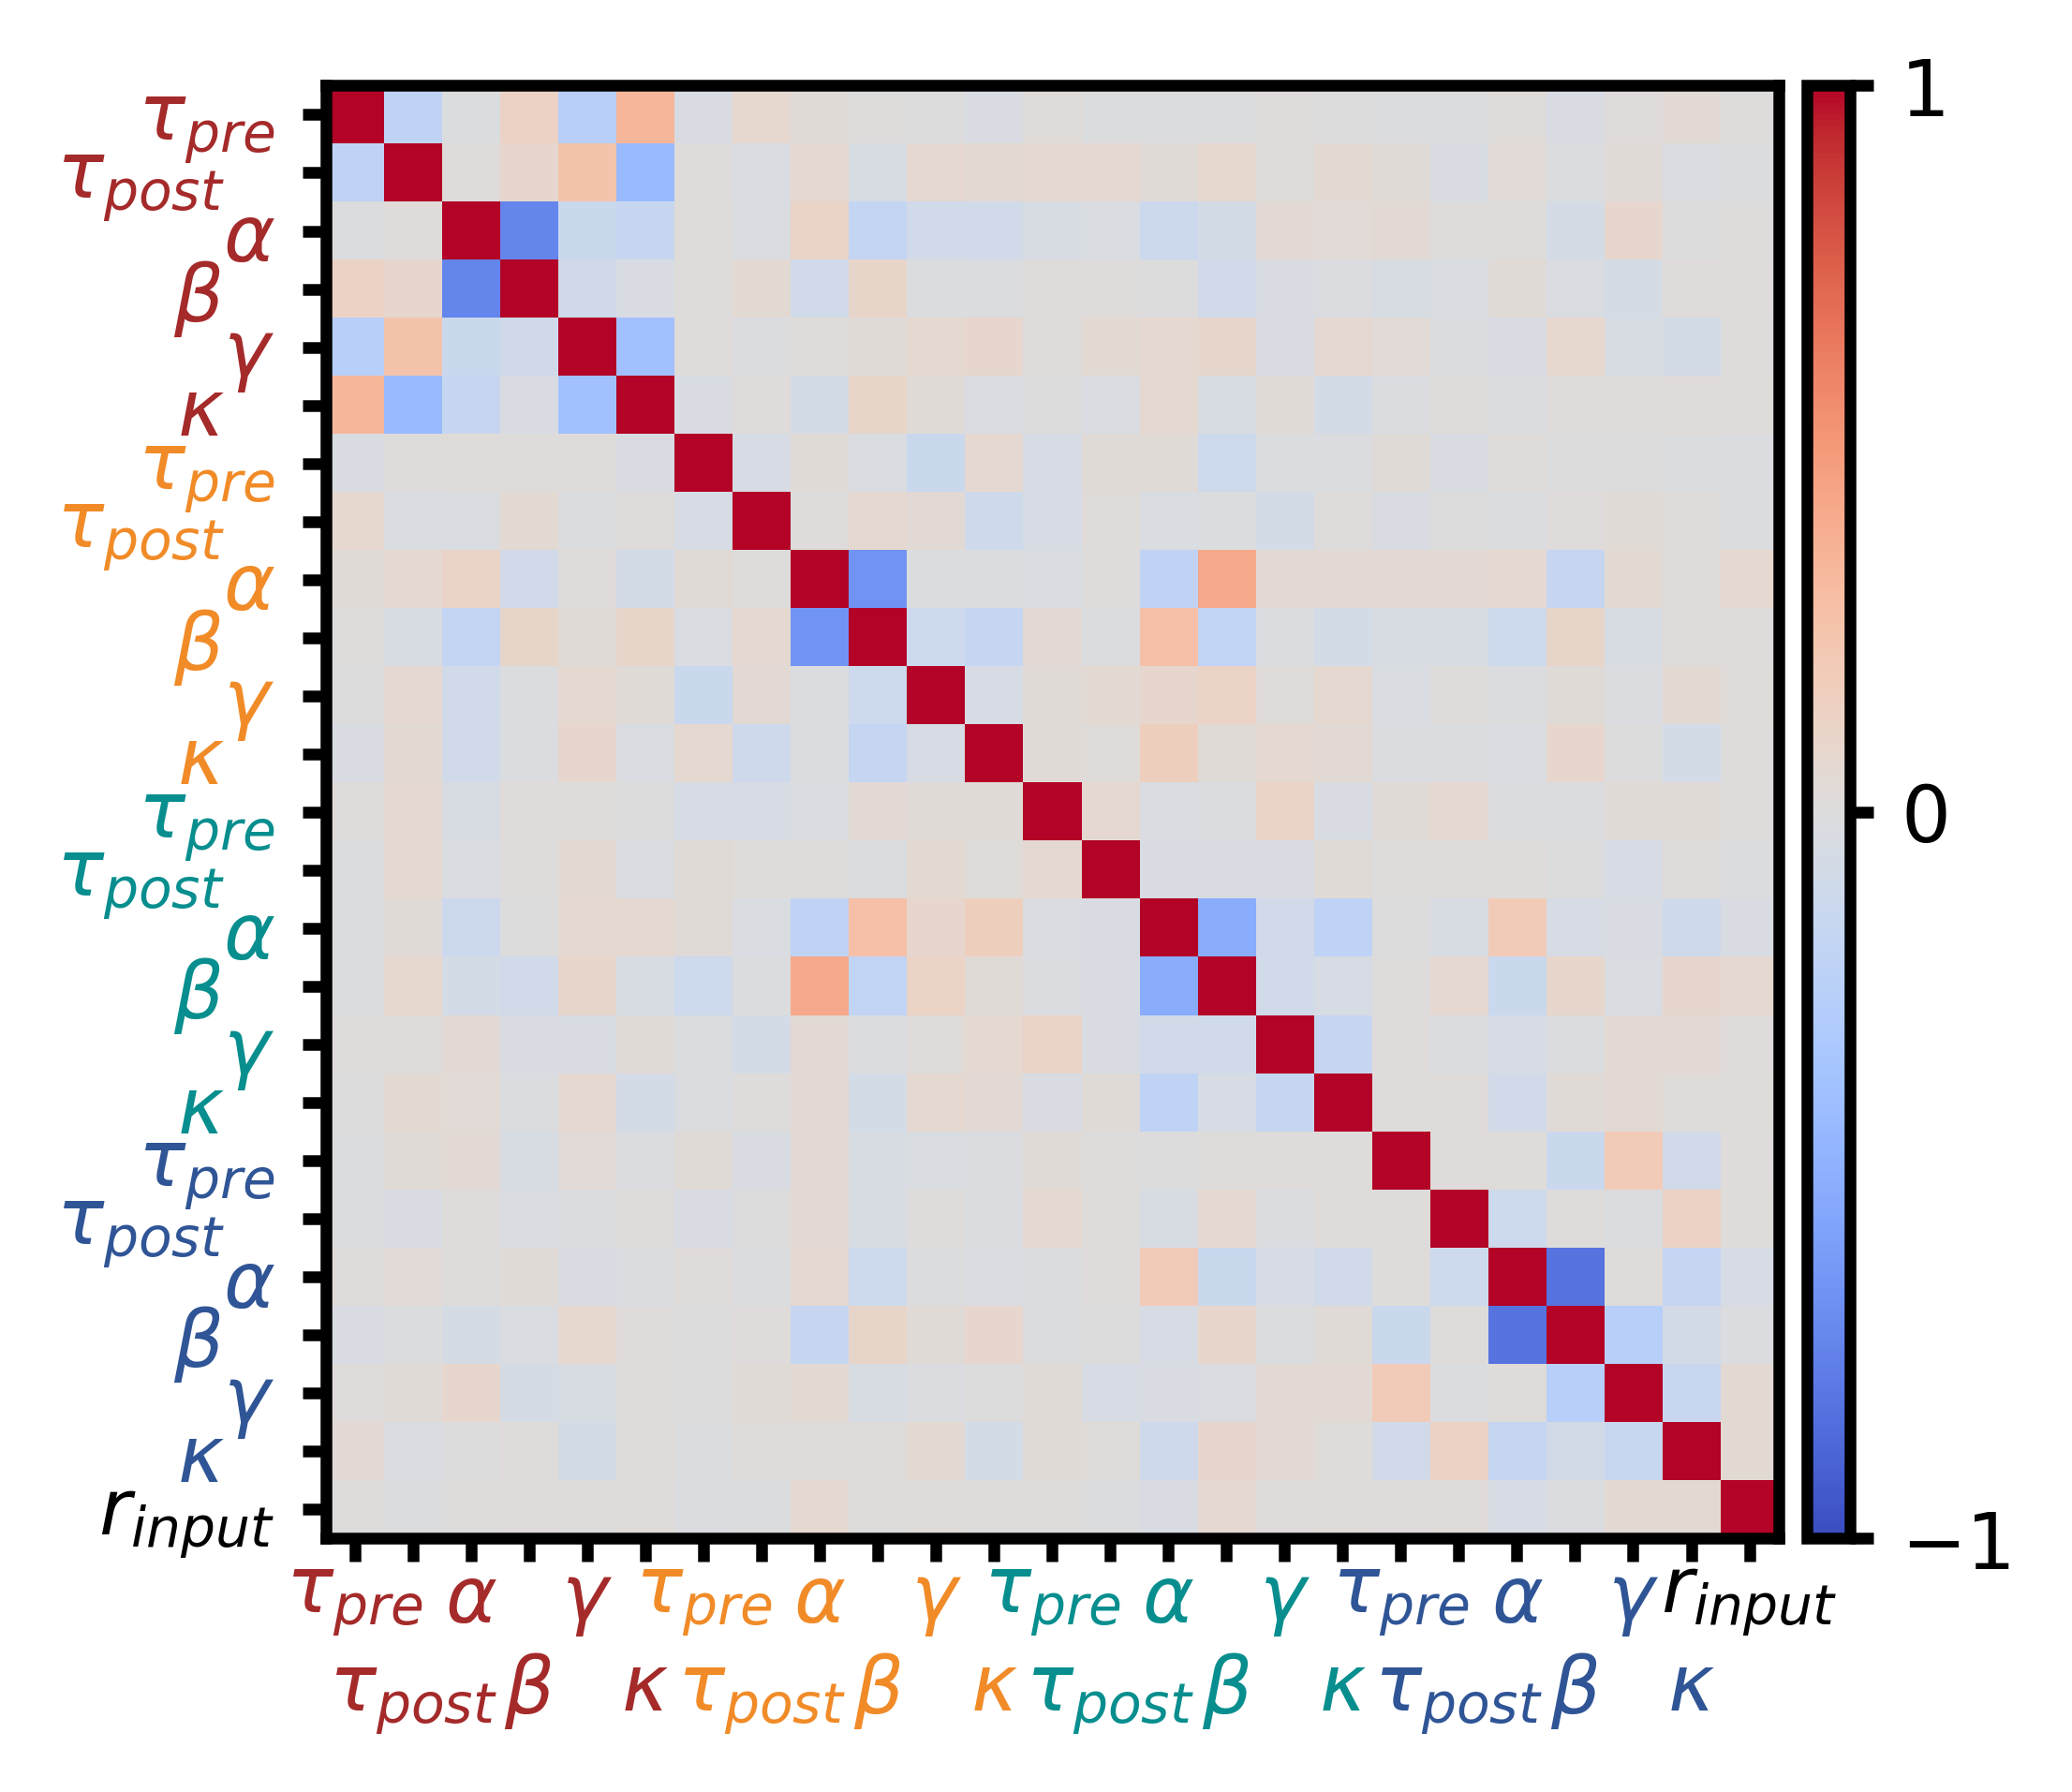

In [21]:
labelsx = [r"$\tau_{pre}$", "\n"+r'$\tau_{post}$', r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r"$\tau_{pre}$", "\n"+r"$\tau_{post}$", r"$\alpha$", "\n"+r"$\beta$", r"$\gamma$", "\n"+r"$\kappa$",
          r'$r_{input}$']

labelsy = [r"$\tau_{pre}$", r'$\tau_{post}$'+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r"$\tau_{pre}$", r"$\tau_{post}$"+"   ", r"$\alpha$", r"$\beta$"+"   ", r"$\gamma$", r"$\kappa$"+"   ",
          r'$r_{input}$']

aux.plot_mat_poly(corr_matrix_marginal,
             figsize=(3.5,3.5),
             cmap="coolwarm",
             dpi=600,
             linewidth=1.5,
             fontsize=10,
             rotation=0,
             labelsx=labelsx,
             labelsy=labelsy,
             color_ee=color_ee,
             color_ei=color_ei,
             color_ie=color_ie,
             color_ii=color_ii)

#### Plot pre post protocol of some rules

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


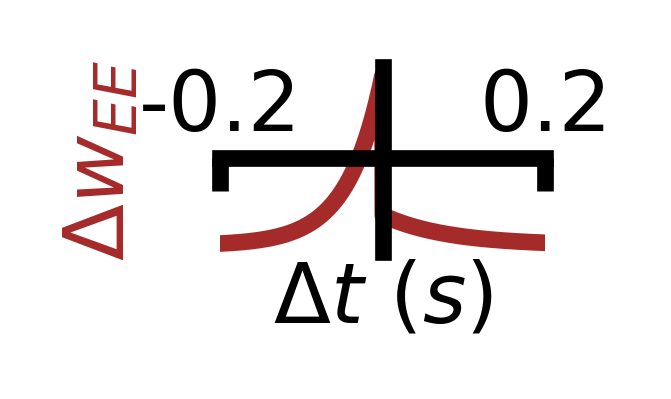

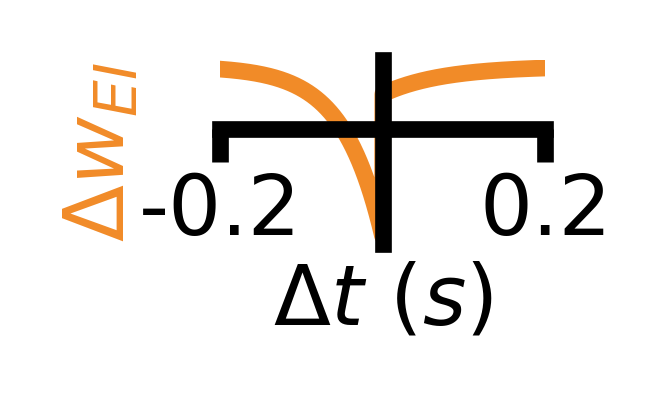

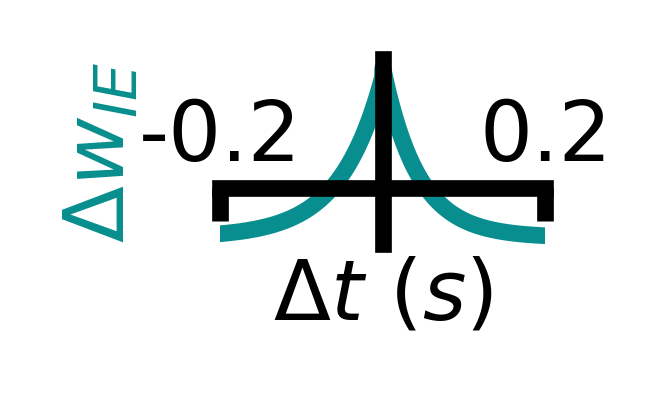

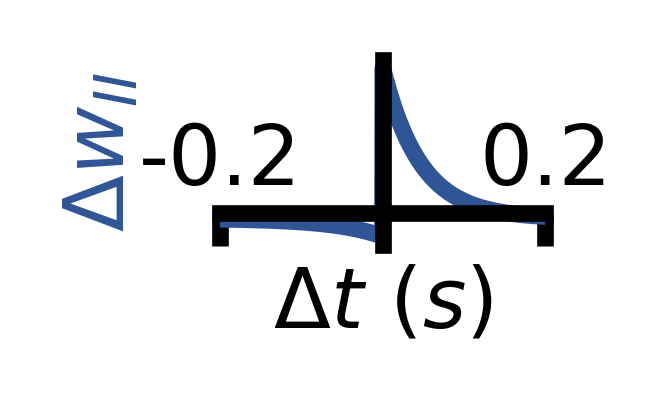

In [22]:
thetas_fSBI_far_from_MF_full2 = [[ 0.07993973,  0.0434418 ,  0.78235912, -1.35886991,  0.19831893,  1.12658083,  0.07336256,  0.04908441,  1.05090225, -0.7131474 , -0.14983934, -0.91712892,  0.04346195,  0.05300765, -1.72836304,  1.21889496,  1.7681005 ,  1.66900492,  0.04633604,  0.06136559, -1.15435505,  1.08872306,  1.77809024, -0.21059152, 10.13021278]]
thetas = thetas_fSBI_far_from_MF_full2

aux.plot_rule(thetas=thetas[0][0:6], n_bins=1000, x_lim=[-0.2,0.2],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{EE}$', color=color_ee, color_ylabel=color_ee, figsize=(0.7,0.4), 
              labelpad_xlabel=8, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=-15, yticks_pad=0)

aux.plot_rule(thetas=thetas[0][6:12], n_bins=1000, x_lim=[-0.2,0.2], #y_lim=[-1.1,0],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{EI}$', color=color_ei, color_ylabel=color_ei, figsize=(0.7,0.4), 
              labelpad_xlabel=1, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=1, yticks_pad=0)

aux.plot_rule(thetas=thetas[0][12:18], n_bins=1000, x_lim=[-0.2,0.2],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{IE}$', color=color_ie, color_ylabel=color_ie, figsize=(0.7,0.4), 
              labelpad_xlabel=4, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=-15, yticks_pad=0)

aux.plot_rule(thetas=thetas[0][18:24], n_bins=1000, x_lim=[-0.2,0.2],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{II}$', color=color_ii, color_ylabel=color_ii, figsize=(0.7,0.4), 
              labelpad_xlabel=2, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=-15, yticks_pad=0)

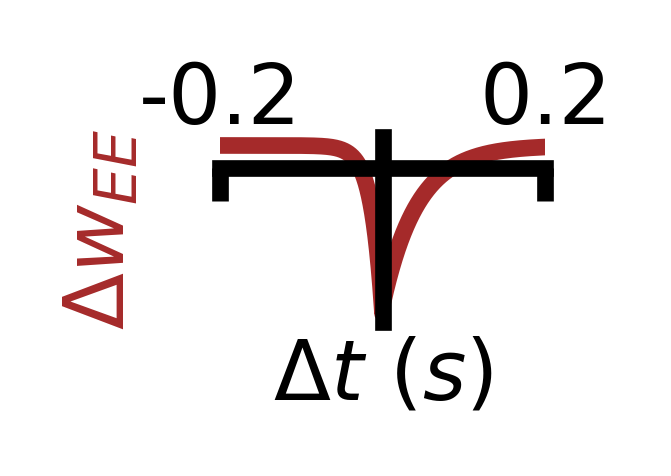

In [23]:
thetas_MF_close_to_fSBI = [[0.04307878, 0.01365376, -1.66118666, 1.89824709, -1.64213583, -1.76768147, 
                            0.1, 0.1, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0, 0, 10]]
thetas = thetas_MF_close_to_fSBI

aux.plot_rule(thetas=thetas[0][0:6], n_bins=1000, x_lim=[-0.2,0.2],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{EE}$', color=color_ee, color_ylabel=color_ee, figsize=(0.7,0.4), 
              labelpad_xlabel=16, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=-17, yticks_pad=0)

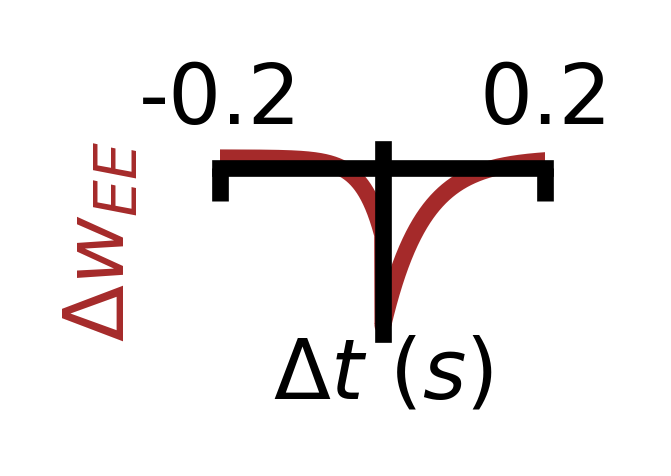

In [24]:
thetas_MF_far_from_fSBI = [[ 0.04869124,  0.0251173 ,  1.70076012, -1.66782219, -0.52389363, -0.24149551,
                            0.1, 0.1, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0, 0, 10]]
thetas = thetas_MF_far_from_fSBI

aux.plot_rule(thetas=thetas[0][0:6], n_bins=1000, x_lim=[-0.2,0.2],
          y_ticks=[],x_ticks=[-0.2,0.2], x_ticklabels=[-0.2,0.2], x_label=r'$\Delta t \ (s)$',
          y_label=r'$\Delta w_{EE}$', color=color_ee, color_ylabel=color_ee, figsize=(0.7,0.4), 
              labelpad_xlabel=16, fontsize=10,
              labelpad_ylabel=25, linewidth=2, axwidth=2, dpi=600,
             xticks_pad=-17, yticks_pad=0)